In [4]:
# Specify the parent directory
parent_directory = "~/materials_daniel/data"

# Get a list of all folders inside the parent directory
folders = [folder for folder in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, folder))]

# Iterate over each folder
for folder in folders:
    # Construct the folder path
    folder_path = os.path.join(parent_directory, folder)

    # Find the Excel file in the folder
    excel_file = None
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".xlsx") or file.endswith(".xls"):
                excel_file = os.path.join(root, file)
                break
        if excel_file is not None:
            break

    # Check if an Excel file was found
    if excel_file is not None:
        # Read the Excel file into a pandas DataFrame
        df = pd.read_excel(excel_file)
        # Perform operations on the DataFrame as needed
        # ...
    else:
        print(f"No Excel file found in the folder: {folder_path}")

FileNotFoundError: [Errno 2] No such file or directory: '~/materials_daniel/data'

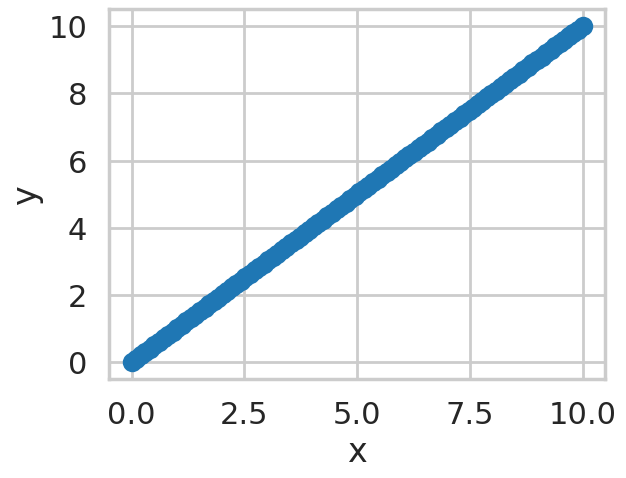

In [6]:
# Arbitrary x and y data that is a line plot with length of 100 for 10 samples

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)

# Create a dataframe with the x and y data

df = pd.DataFrame({'x': x, 'y': y})

# Create a function to plot the data

def plot_data(df, x, y):
    """Plot x and y data"""
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Plot the data

plot_data(df, 'x', 'y')


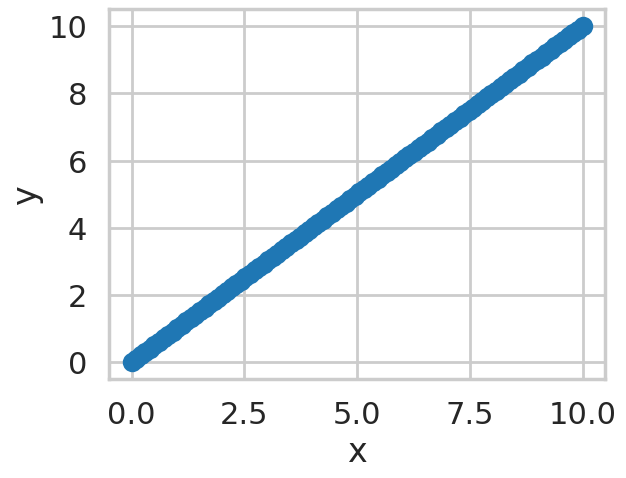

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.612e+31
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:40:52   Log-Likelihood:                 3177.1
No. Observations:                 100   AIC:                            -6350.
Df Residuals:                      98   BIC:                            -6345.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0   7.73e-16          0      1.0

/home/trevor/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:848: RuntimeWarning: divide by zero encountered in divide
  return self.resid / sigma / np.sqrt(1 - hii)
/home/trevor/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:848: RuntimeWarning: divide by zero encountered in divide
  return self.resid / sigma / np.sqrt(1 - hii)


In [7]:
# add confidence intervals and statistical metrics to the plot

def plot_data_with_ci(df, x, y):
    """Plot x and y data with confidence intervals"""
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    mod = smf.ols(formula='y ~ x', data=df)
    res = mod.fit()
    print(res.summary())
    print(anova_lm(res))
    print(res.conf_int())
    print(res.params)
    print(res.rsquared)
    print(res.rsquared_adj)
    print(res.fittedvalues)
    print(res.resid)
    print(res.predict())
    print(res.predict(exog=dict(x=2.5)))
    print(res.predict(exog=dict(x=[1, 2.5, 5])))
    print(res.get_prediction(exog=dict(x=2.5)))
    print(res.get_prediction(exog=dict(x=[1, 2.5, 5])))
    print(res.get_prediction(exog=dict(x=[1, 2.5, 5])).summary_frame(alpha=0.05))
    print(res.outlier_test())
    print(res.outlier_test()['bonf(p)'])
    print(res.outlier_test()['student_resid'])
    print(res.outlier_test()['unadj_p'])
    print(res.outlier_test()['student_resid'].abs().sort_values(ascending=False))
    print(res.outlier_test()['unadj_p'].abs().sort_values(ascending=False))

# Plot the data with confidence intervals

plot_data_with_ci(df, 'x', 'y')
